In [2]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance, test_acc
from dataset import get_loader, dataset_mean, dataset_std
from model import nn, S9Model
from torchsummary import summary

In [3]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = get_loader(**kwargs)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


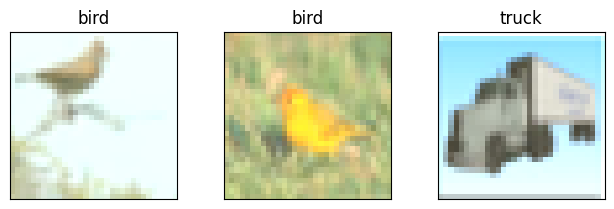

In [4]:
plot_dataset_sample(train_loader, dataset_mean, dataset_std)

In [5]:
device = torch.device("cuda" if cuda else "cpu")
model = S9Model(16, norm='bn').to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
         Dropout2d-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,320
       BatchNorm2d-5           [-1, 16, 32, 32]              32
         Dropout2d-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]           2,320
       BatchNorm2d-8           [-1, 16, 32, 32]              32
         Dropout2d-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 16, 32, 32]             160
           Conv2d-11           [-1, 32, 32, 32]             544
      BatchNorm2d-12           [-1, 32, 32, 32]              64
        Dropout2d-13           [-1, 32, 32, 32]               0
           Conv2d-14           [-1, 32,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)
# New Line
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=1, threshold=0.001, threshold_mode='abs', eps=0.001, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 100

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step(test_acc[-1]*0.01)
  
#plot_incorrect_preds(dataset_mean, dataset_std, 15)

Epoch 1


Train: Loss=1.3965 Batch_id=781 Accuracy=36.58: 100%|██████████| 782/782 [06:12<00:00,  2.10it/s]


Test set: Average loss: 1.3362, Accuracy: 5074/10000 (50.74%)

Epoch 2


Train: Loss=1.7470 Batch_id=781 Accuracy=49.38: 100%|██████████| 782/782 [05:38<00:00,  2.31it/s]


Test set: Average loss: 1.1368, Accuracy: 5916/10000 (59.16%)

Epoch 3


Train: Loss=1.0874 Batch_id=781 Accuracy=55.47: 100%|██████████| 782/782 [05:36<00:00,  2.32it/s]


Test set: Average loss: 1.0408, Accuracy: 6283/10000 (62.83%)

Epoch 4


Train: Loss=2.1104 Batch_id=781 Accuracy=60.19: 100%|██████████| 782/782 [05:54<00:00,  2.20it/s]


Test set: Average loss: 0.9429, Accuracy: 6749/10000 (67.49%)

Epoch 5


Train: Loss=0.9271 Batch_id=781 Accuracy=63.43: 100%|██████████| 782/782 [05:55<00:00,  2.20it/s]


Test set: Average loss: 0.8184, Accuracy: 7197/10000 (71.97%)

Epoch 6


Train: Loss=1.0048 Batch_id=781 Accuracy=65.30: 100%|██████████| 782/782 [05:28<00:00,  2.38it/s]


Test set: Average loss: 0.7589, Accuracy: 7360/10000 (73.60%)

Epoch 7


Train: Loss=0.9277 Batch_id=781 Accuracy=66.80: 100%|██████████| 782/782 [05:47<00:00,  2.25it/s]


Test set: Average loss: 0.7493, Accuracy: 7382/10000 (73.82%)

Epoch 8


Train: Loss=1.3592 Batch_id=781 Accuracy=68.47: 100%|██████████| 782/782 [05:49<00:00,  2.24it/s]


Test set: Average loss: 0.6919, Accuracy: 7676/10000 (76.76%)

Epoch 9


Train: Loss=1.5236 Batch_id=781 Accuracy=69.52: 100%|██████████| 782/782 [05:45<00:00,  2.26it/s]


Test set: Average loss: 0.6420, Accuracy: 7810/10000 (78.10%)

Epoch 10


Train: Loss=0.8150 Batch_id=781 Accuracy=70.72: 100%|██████████| 782/782 [06:15<00:00,  2.08it/s]


Test set: Average loss: 0.6334, Accuracy: 7834/10000 (78.34%)

Epoch 11


Train: Loss=1.5170 Batch_id=781 Accuracy=70.99: 100%|██████████| 782/782 [06:22<00:00,  2.04it/s]


Test set: Average loss: 0.6044, Accuracy: 7952/10000 (79.52%)

Epoch 12


Train: Loss=1.0824 Batch_id=781 Accuracy=71.73: 100%|██████████| 782/782 [06:14<00:00,  2.09it/s]


Test set: Average loss: 0.6052, Accuracy: 7937/10000 (79.37%)

Epoch 13


Train: Loss=1.0829 Batch_id=781 Accuracy=73.14: 100%|██████████| 782/782 [06:16<00:00,  2.08it/s]


Test set: Average loss: 0.5669, Accuracy: 8098/10000 (80.98%)

Epoch 14


Train: Loss=0.6474 Batch_id=781 Accuracy=73.19: 100%|██████████| 782/782 [06:20<00:00,  2.06it/s]


Test set: Average loss: 0.5568, Accuracy: 8133/10000 (81.33%)

Epoch 15


Train: Loss=0.6355 Batch_id=781 Accuracy=73.71: 100%|██████████| 782/782 [06:27<00:00,  2.02it/s]


Test set: Average loss: 0.5264, Accuracy: 8216/10000 (82.16%)

Epoch 16


Train: Loss=0.6642 Batch_id=781 Accuracy=74.36: 100%|██████████| 782/782 [06:35<00:00,  1.98it/s]


Test set: Average loss: 0.5292, Accuracy: 8202/10000 (82.02%)

Epoch 17


Train: Loss=0.6756 Batch_id=781 Accuracy=74.93: 100%|██████████| 782/782 [06:43<00:00,  1.94it/s]


Test set: Average loss: 0.5514, Accuracy: 8159/10000 (81.59%)

Epoch 00017: reducing learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.4190 Batch_id=781 Accuracy=76.91: 100%|██████████| 782/782 [06:30<00:00,  2.00it/s]


Test set: Average loss: 0.4809, Accuracy: 8351/10000 (83.51%)

Epoch 19


Train: Loss=0.6412 Batch_id=781 Accuracy=77.62: 100%|██████████| 782/782 [06:29<00:00,  2.01it/s]


Test set: Average loss: 0.4665, Accuracy: 8378/10000 (83.78%)

Epoch 20


Train: Loss=0.6554 Batch_id=781 Accuracy=77.45: 100%|██████████| 782/782 [06:32<00:00,  1.99it/s]


Test set: Average loss: 0.4624, Accuracy: 8419/10000 (84.19%)

Epoch 21


Train: Loss=0.5678 Batch_id=781 Accuracy=77.71: 100%|██████████| 782/782 [06:41<00:00,  1.95it/s]


Test set: Average loss: 0.4584, Accuracy: 8441/10000 (84.41%)

Epoch 22


Train: Loss=0.3720 Batch_id=781 Accuracy=77.89: 100%|██████████| 782/782 [06:44<00:00,  1.93it/s]


Test set: Average loss: 0.4562, Accuracy: 8428/10000 (84.28%)

Epoch 23


Train: Loss=0.7143 Batch_id=781 Accuracy=77.98: 100%|██████████| 782/782 [07:04<00:00,  1.84it/s]


Test set: Average loss: 0.4597, Accuracy: 8420/10000 (84.20%)

Epoch 24


Train: Loss=1.0993 Batch_id=781 Accuracy=78.40: 100%|██████████| 782/782 [07:01<00:00,  1.85it/s]


Test set: Average loss: 0.4518, Accuracy: 8462/10000 (84.62%)

Epoch 25


Train: Loss=1.1225 Batch_id=781 Accuracy=78.50: 100%|██████████| 782/782 [07:02<00:00,  1.85it/s]


Test set: Average loss: 0.4514, Accuracy: 8442/10000 (84.42%)

Epoch 26


Train: Loss=1.1547 Batch_id=781 Accuracy=78.66: 100%|██████████| 782/782 [06:57<00:00,  1.87it/s]


Test set: Average loss: 0.4530, Accuracy: 8468/10000 (84.68%)

Epoch 27


Train: Loss=0.8737 Batch_id=781 Accuracy=78.20: 100%|██████████| 782/782 [07:06<00:00,  1.84it/s]


Test set: Average loss: 0.4501, Accuracy: 8440/10000 (84.40%)

Epoch 28


Train: Loss=0.3743 Batch_id=781 Accuracy=78.56: 100%|██████████| 782/782 [07:04<00:00,  1.84it/s]


Test set: Average loss: 0.4472, Accuracy: 8473/10000 (84.73%)

Epoch 29


Train: Loss=0.7227 Batch_id=424 Accuracy=78.58:  54%|█████▍    | 424/782 [03:56<03:02,  1.96it/s]

In [ ]:
plot_model_performance()